In [94]:
a =[0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1]
for i in range(8):
    a.append(0)
crc8 = [1,1,1,0,1,0,1,0,1]

for i in range(0,208):
    if a[i]:
        for j in range(0,9):
            a[i+j] ^= crc8[j];

for i in range(208,216):
    print(a[i],end='')

00000000

In [1]:
a=107355857 
b=596064 
c= 2145237128
print(a*a/(b*c))

9.013288839696008


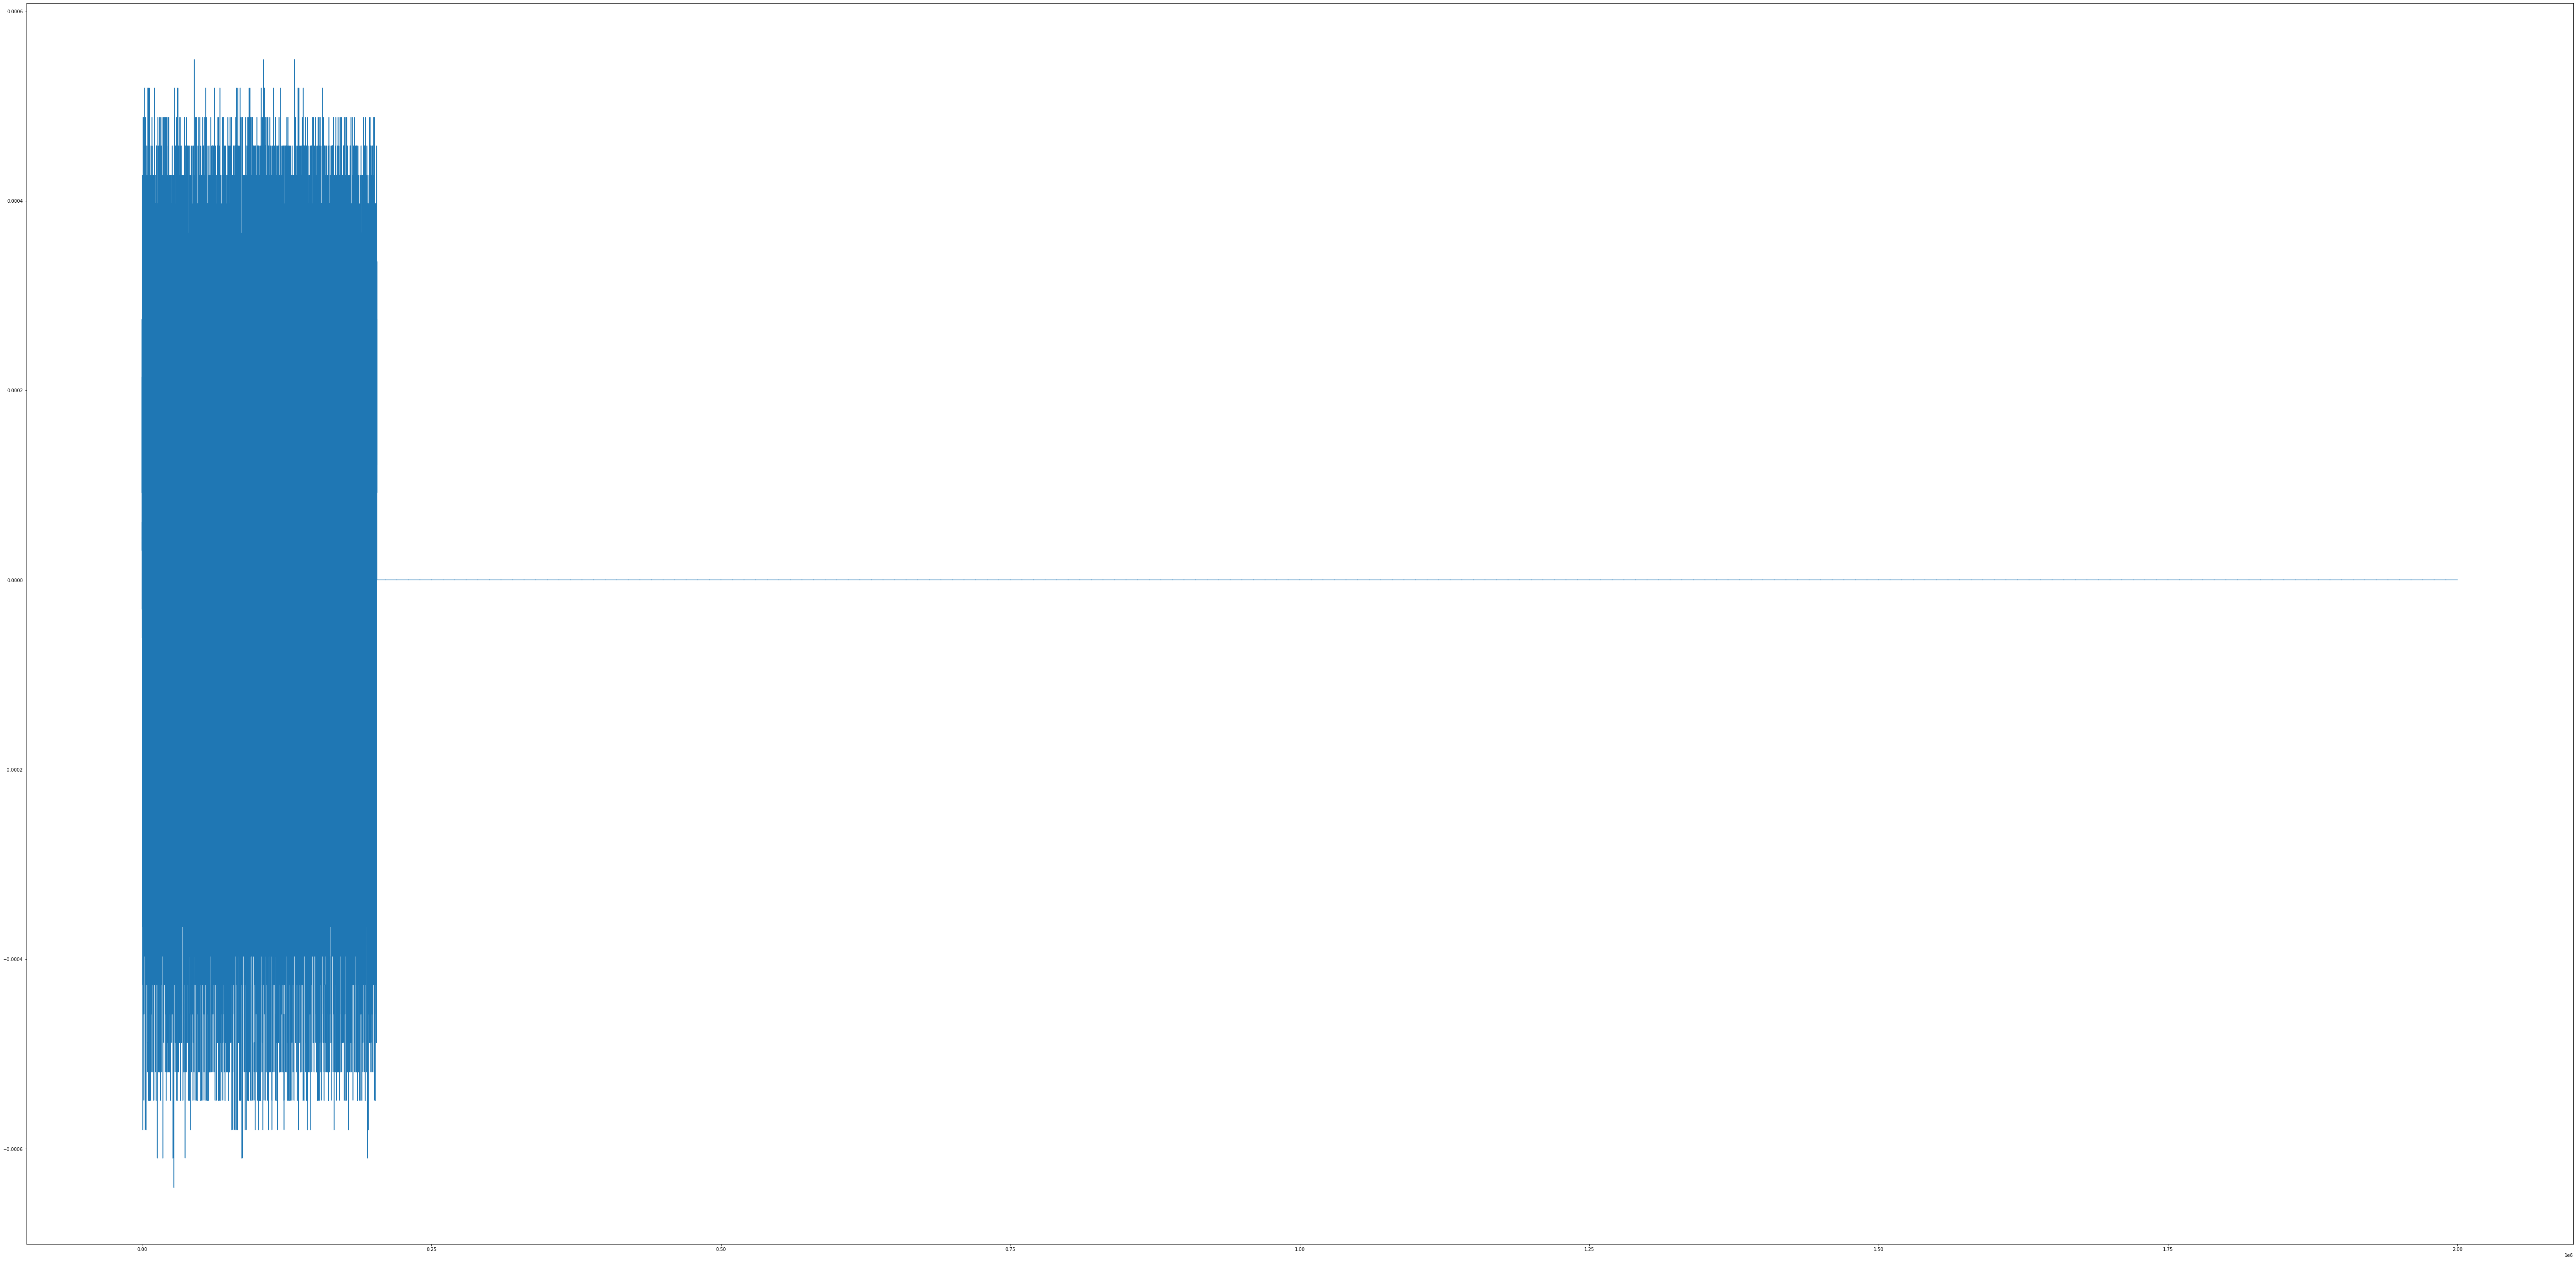

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

show_detail = 1
f = open("preamble.txt")
preamble = []
for line in f:
    for i in line.split(' '):
        if i != '':
            preamble.append(float(i))
f.close() 

preamble_len = len(preamble)

f = open("received.txt")
a = []
for line in f:
    for i in line.split(' '):
        if i != '':
            a.append(float(i))
f.close() 

mpl.rcParams['agg.path.chunksize'] = 10000

if show_detail:    
    plt.figure(figsize=(100,50))        
    plt.plot(a)    
    plt.show()

# if show_detail:    
#     plt.figure(figsize=(100,50))        
#     plt.plot(a[50000:51000])    
#     plt.show()

# percent = []

# points = []

# max = 0
# pos = 0

# running_average = 0

# max_avg = 0

# val = []

# for i in range(0,len(a)-preamble_len):
#     res = np.dot(a[i:i+preamble_len],preamble)

#     res_percent = res*res/(np.dot(preamble,preamble)*np.dot(a[i:i+preamble_len],a[i:i+preamble_len]))

#     running_average += (res_percent-running_average)/(i+1)
#     if running_average > max_avg:
#         max_avg = running_average
#     percent.append(res_percent)
#     val.append(res)

#     if((res_percent > running_average*3 and res_percent>0.2) and (res > max)):
#         max = res
#         pos = i
#     if i > pos + 300 and max!=0:
#         points.append(pos)
#         max=0
#         pos=0;
# if show_detail:    
#     print(max_avg)
#     plt.figure(figsize=(100,50))        
#     plt.plot(percent)
#     plt.ylim(0,1)
#     plt.show()
        
#     plt.figure(figsize=(100,50))        
#     plt.plot(val)
#     plt.show()

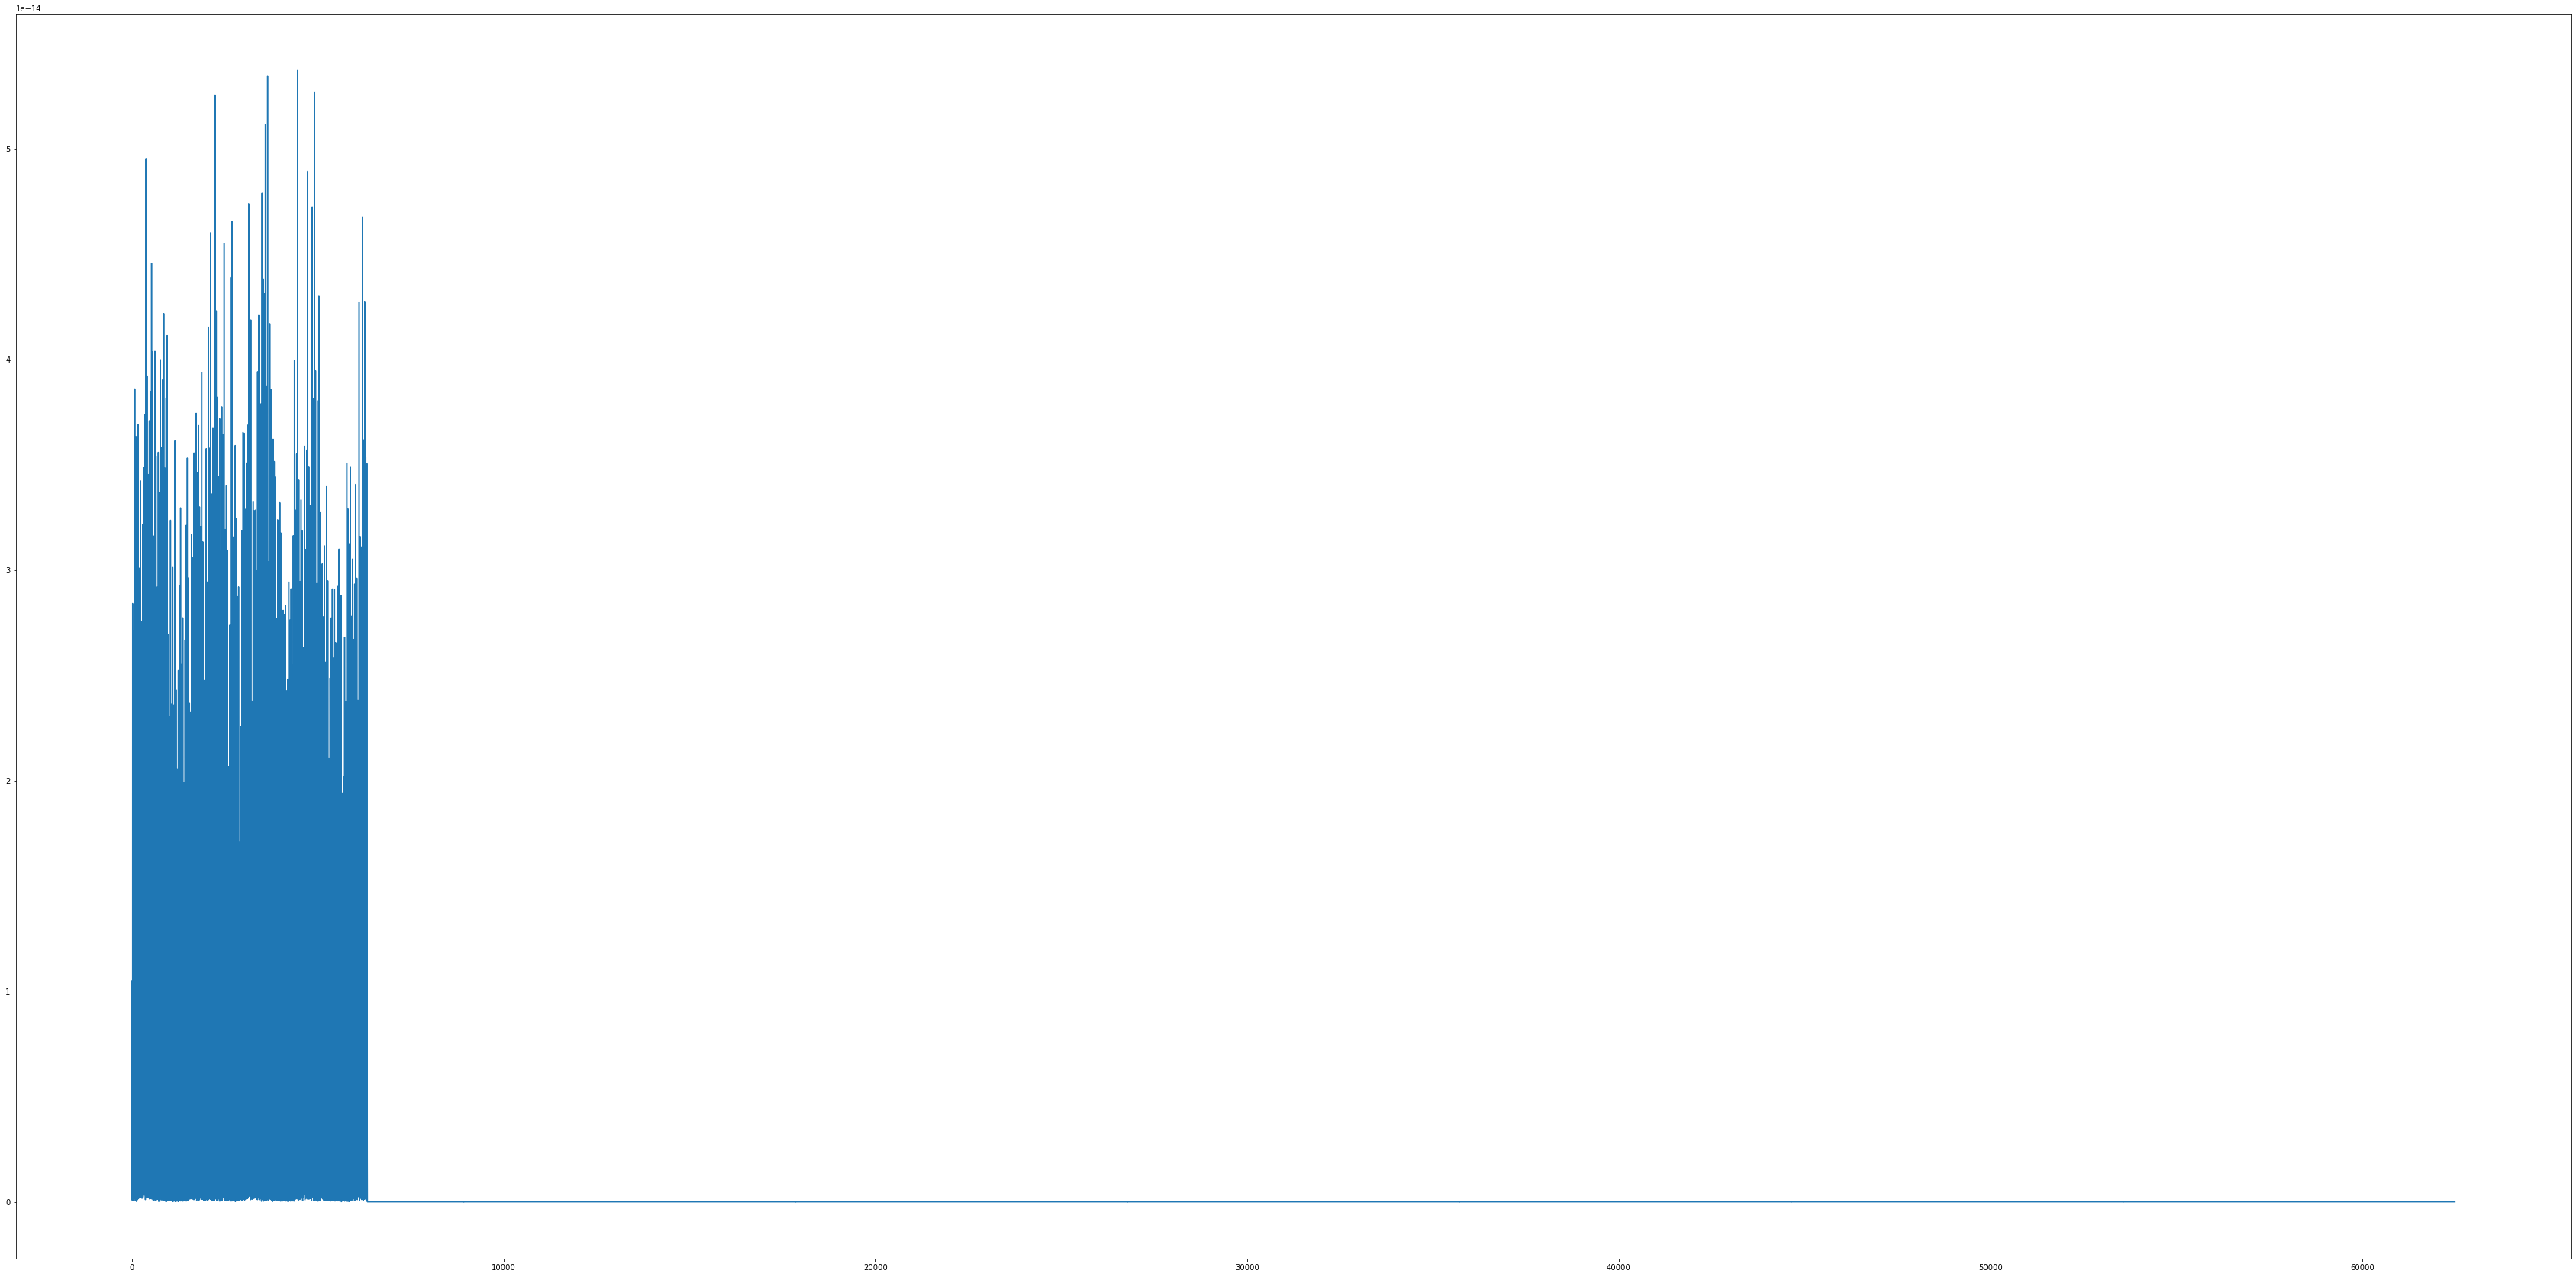

In [43]:
plt.figure(figsize=(60,30))
windows = []
k = 32
for i in range(0,len(a)-k,k):
    sum=0
    for j in range(k):
        sum+=a[i+j]*a[i+j]*a[i+j]*a[i+j]
    windows.append(sum/k)
plt.plot(windows)
windows = []
# k = 64
# for i in range(0,len(a)-k):
#     sum=0
#     for j in range(k):
#         sum+=a[i+j]*a[i+j]
#     windows.append(sum/k)
plt.plot(windows)

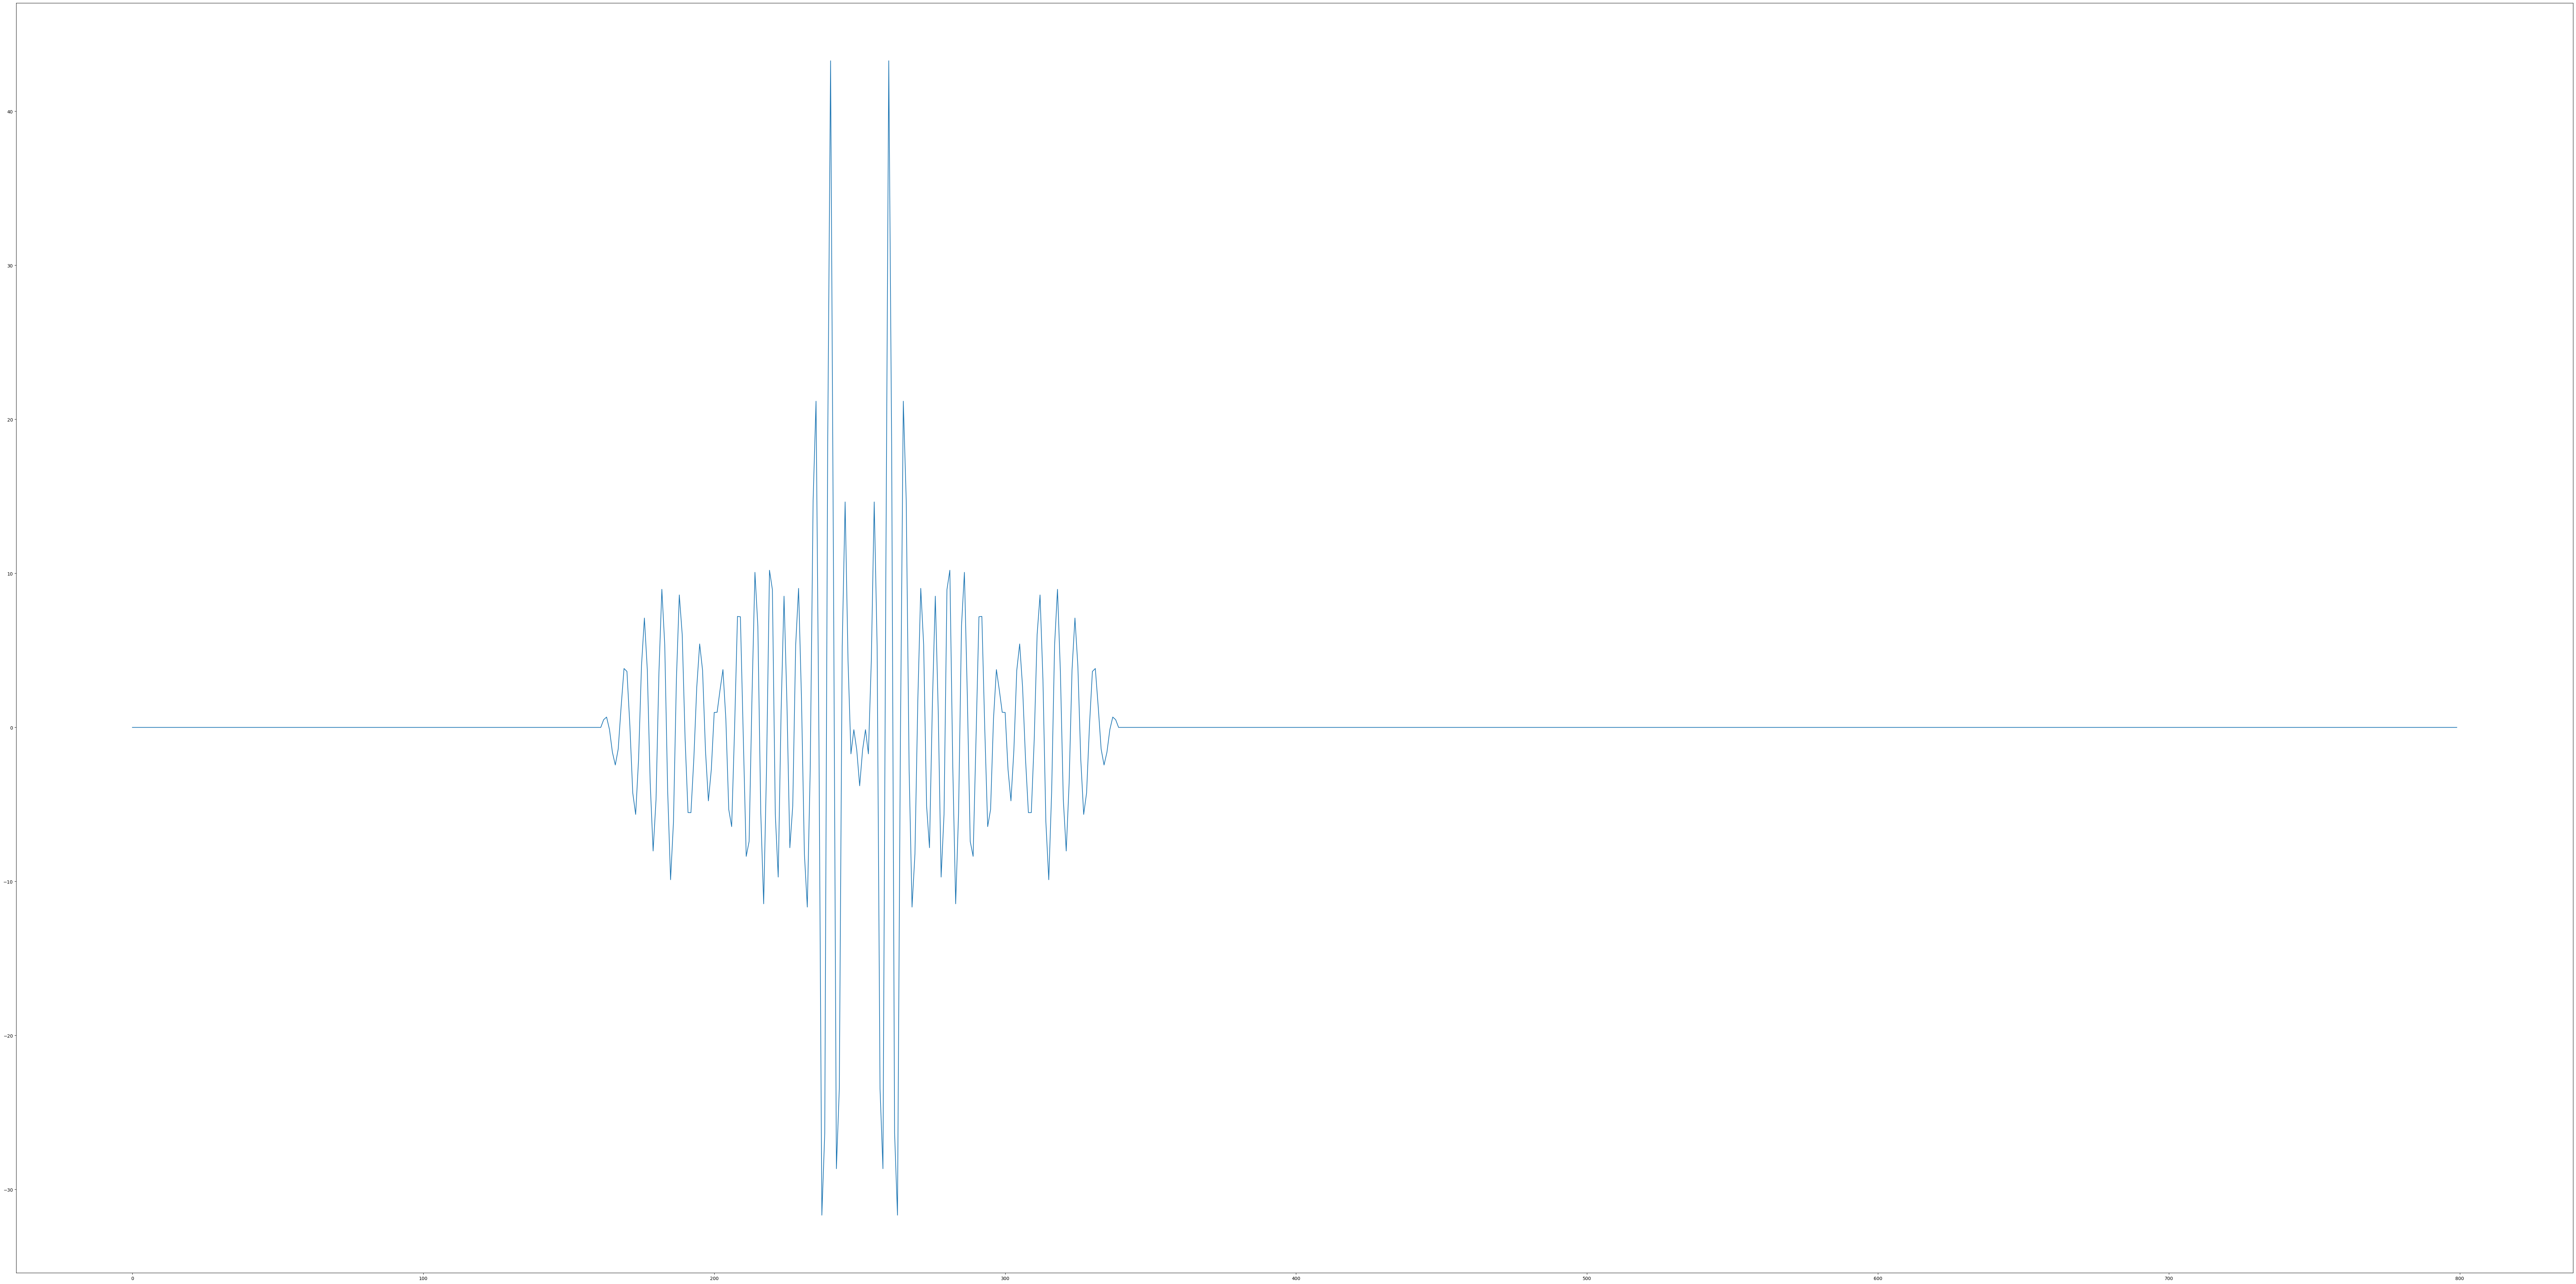

In [104]:
simu = [0 for i in range(800)]
print
for i in range(len(preamble)):
    simu[i+200] += preamble[i]
    simu[i+220] += preamble[i]

plt.figure(figsize=(100,50))
plt.plot(np.correlate(simu,preamble,mode='same'))

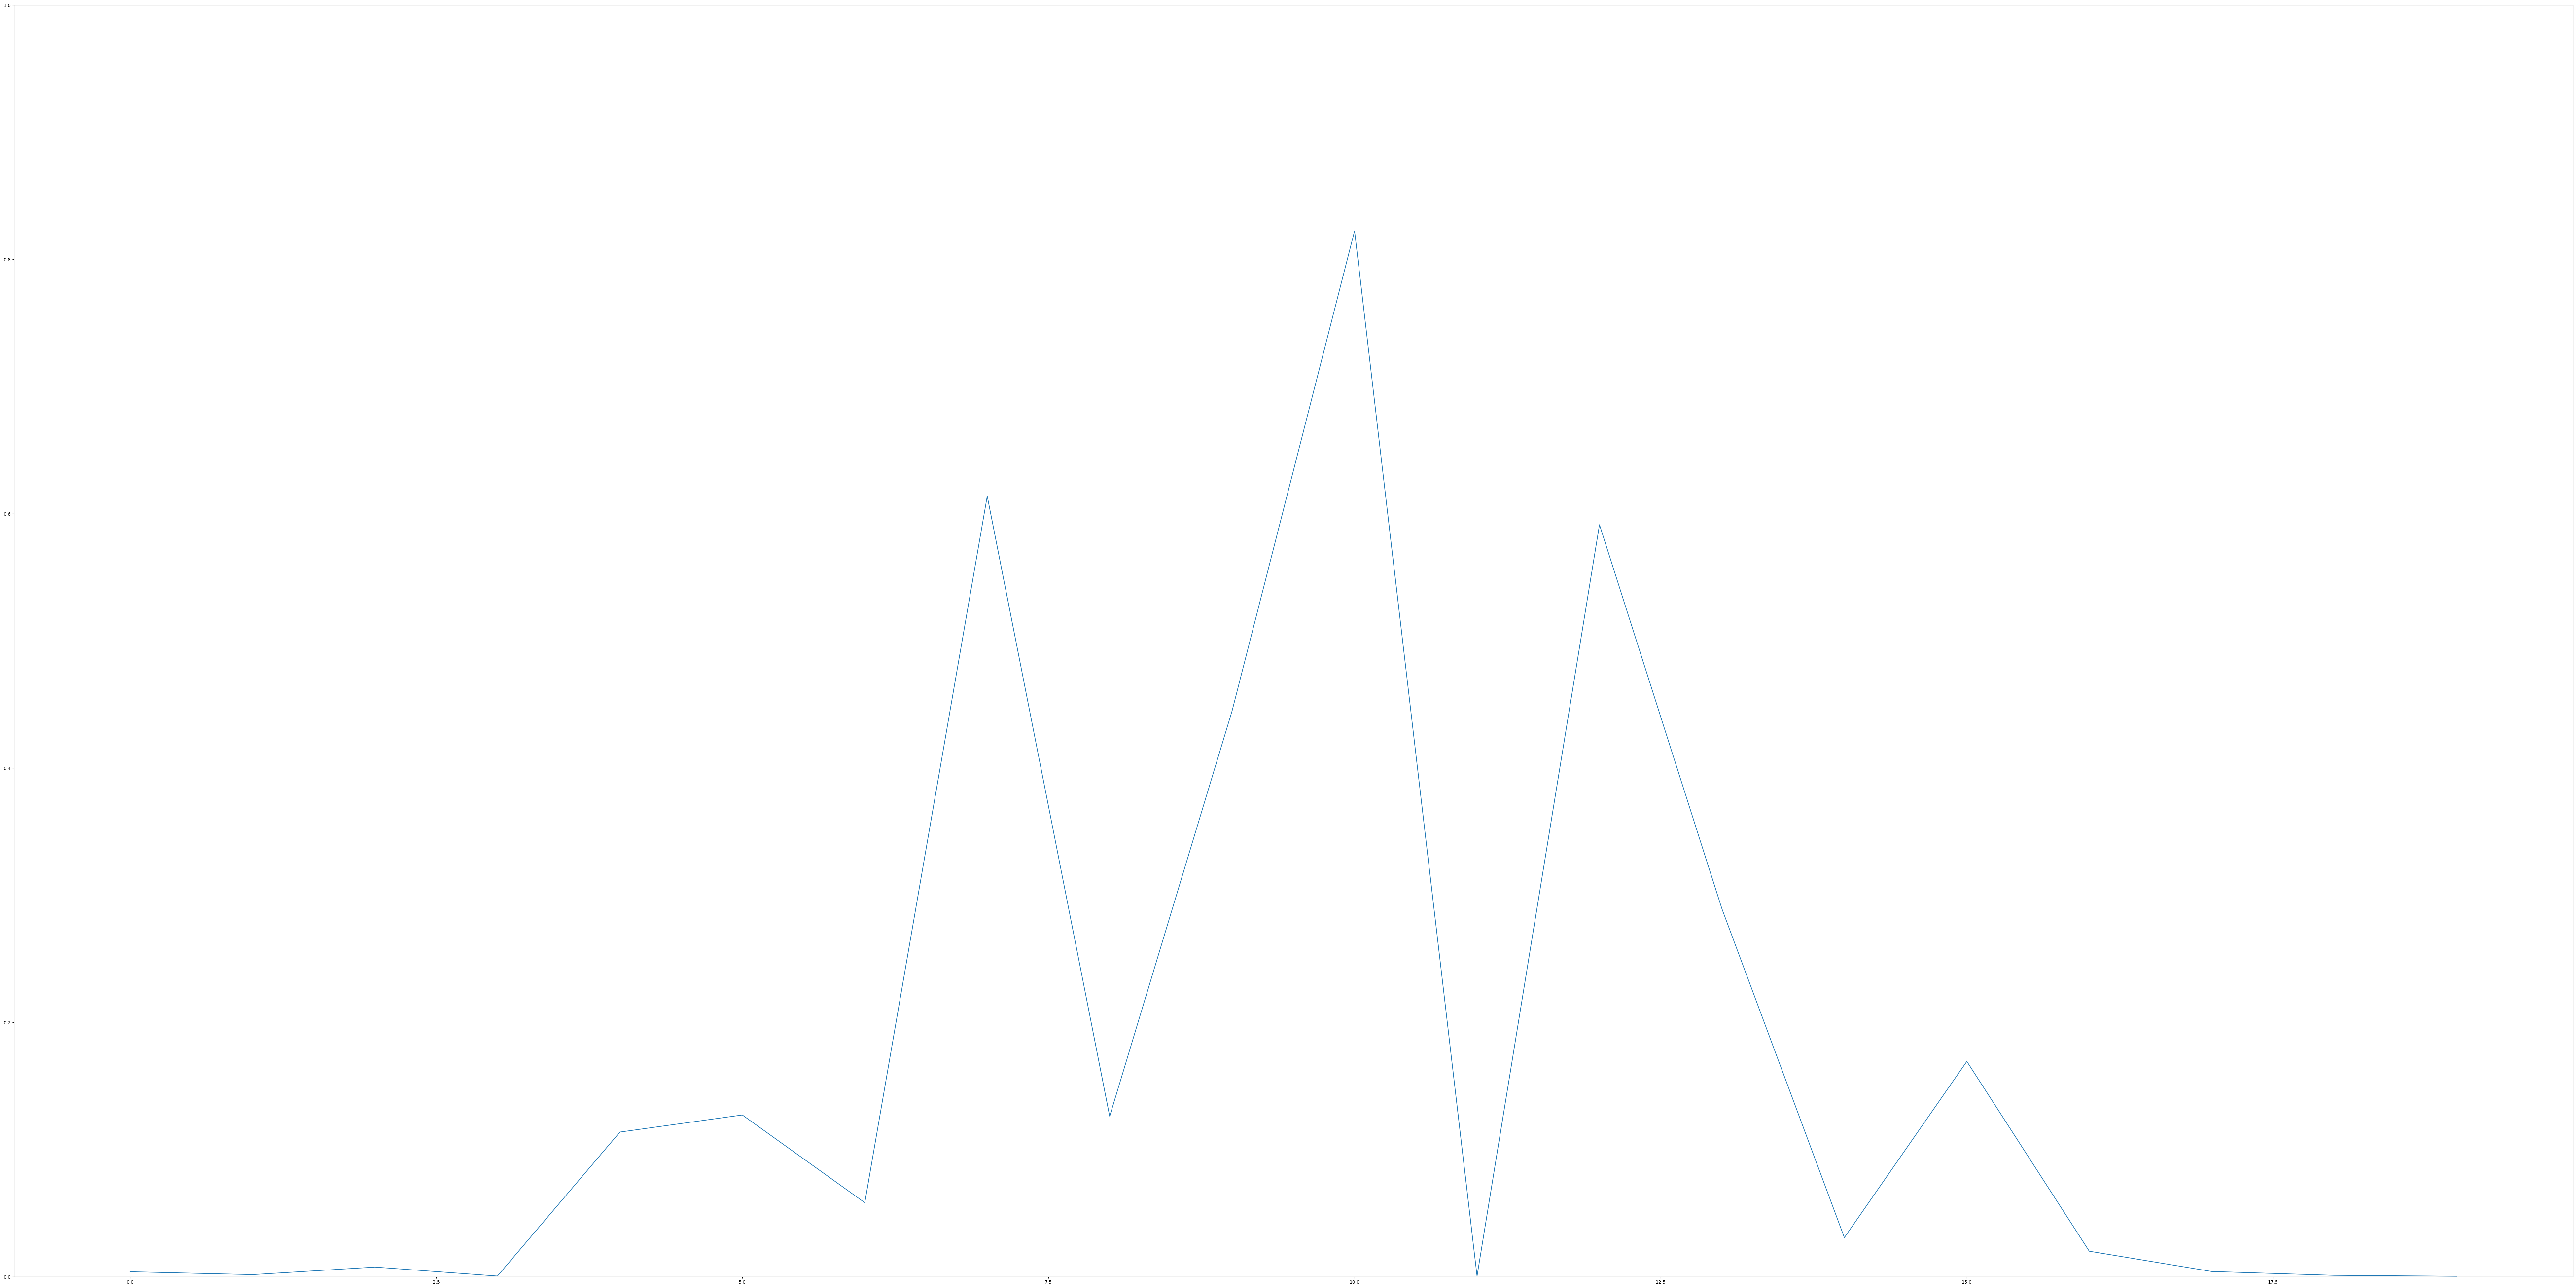

In [36]:
plt.figure(figsize=(100,50))        
plt.plot(percent[950:970])
plt.ylim(0,1)
plt.show()